In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('./data/memory_test.csv')

In [10]:
models = df['Model Name'].unique()

In [11]:
params = {
    'meta-llama/Llama-3.1-8B-Instruct': 8,
    'Qwen/Qwen3-8B':8,
    'google/gemma-2-9b-it':9,
    'Qwen/Qwen3-14B':14,
    'mistralai/Ministral-8B-Instruct-2410':8,
    'Qwen/QwQ-32B':32,
    'Qwen/Qwen3-32B':32,
    'mistralai/Mistral-Small-3.1-24B-Instruct-2503': 24,
    'google/gemma-2-27b-it':27,
    'meta-llama/Llama-3.3-70B-Instruct':70,
    'nvidia/Llama-3_3-Nemotron-Super-49B-v1':49,
    'Qwen/Qwen2-72B-Instruct':72,
    'mistralai/Mixtral-8x7B-Instruct-v0.1': 56,
    'mistralai/Mixtral-8x22B-Instruct-v0.1': 8*22,
    'meta-llama/Llama-4-Scout-17B-16E-Instruct': 16*17,
    'meta-llama/Llama-4-Scout-17B-16E':16*17,
    'Qwen/Qwen3-235B-A22B-FP8' : 235,
    'deepseek-ai/DeepSeek-R1-0528' : 670,
}

df.loc[:, '# params'] = df.apply(lambda x: params[x['Model Name']], axis=1)

In [12]:
transformers_layers = {
    'meta-llama/Llama-3.1-8B-Instruct': 32,
    'Qwen/Qwen3-14B':40,
    'Qwen/QwQ-32B':64,
}

df.loc[:, 'layers'] = df.apply(lambda x: transformers_layers[x['Model Name']], axis=1)

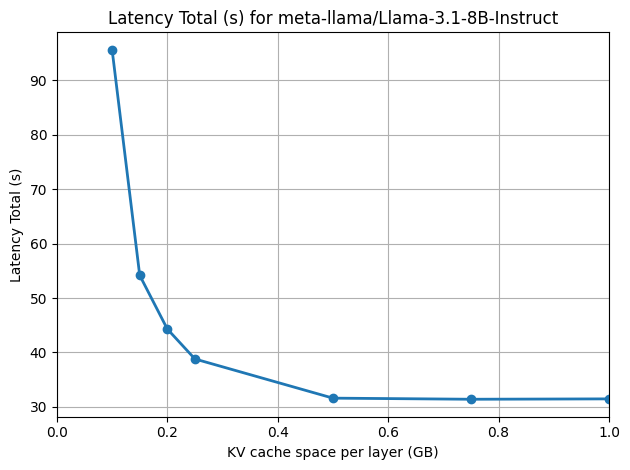

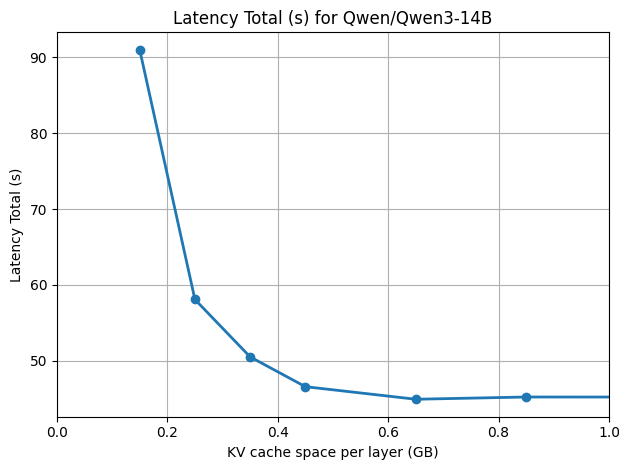

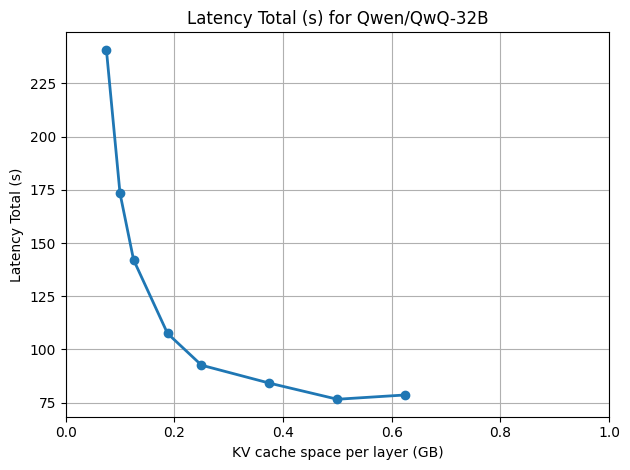

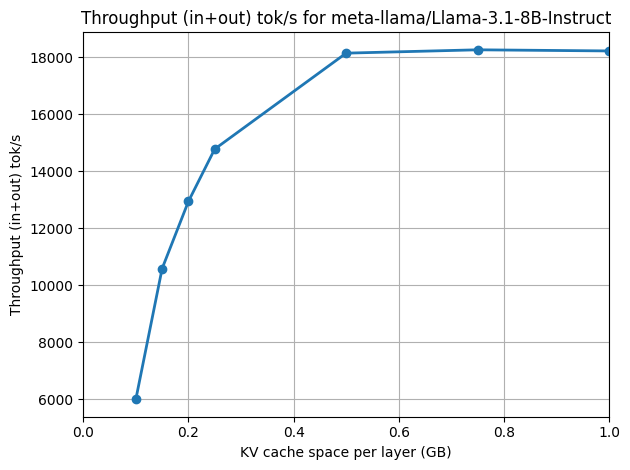

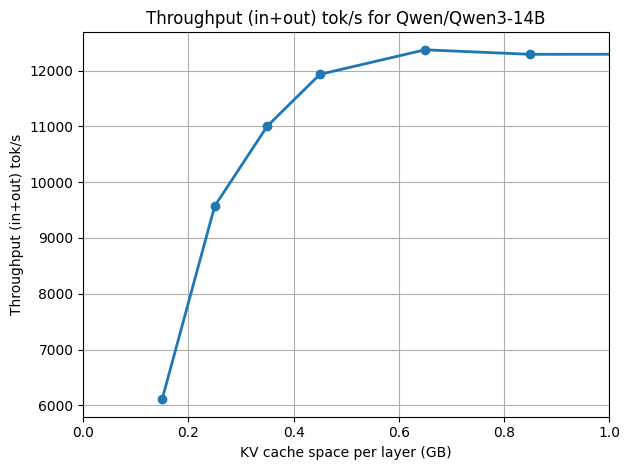

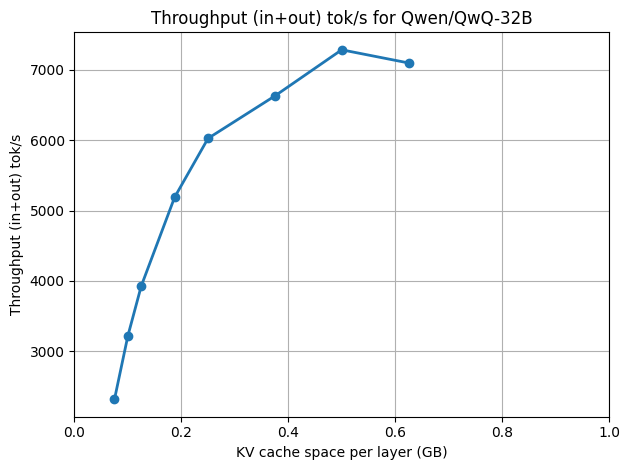

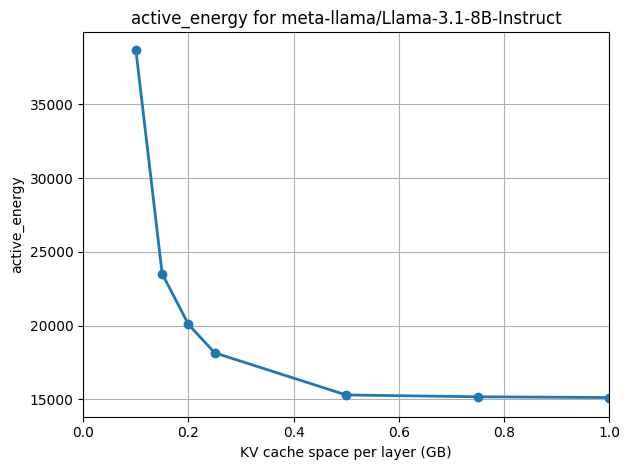

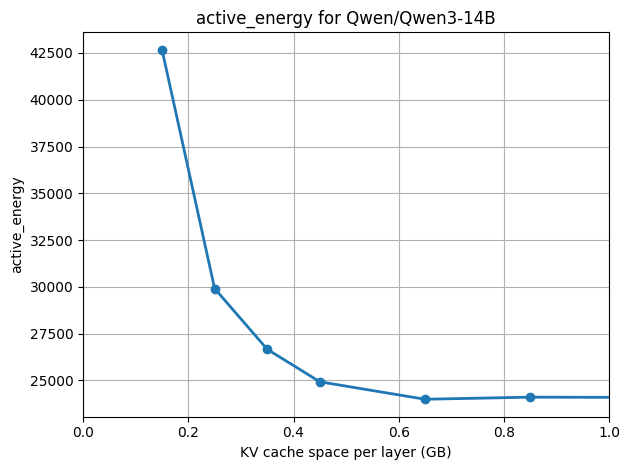

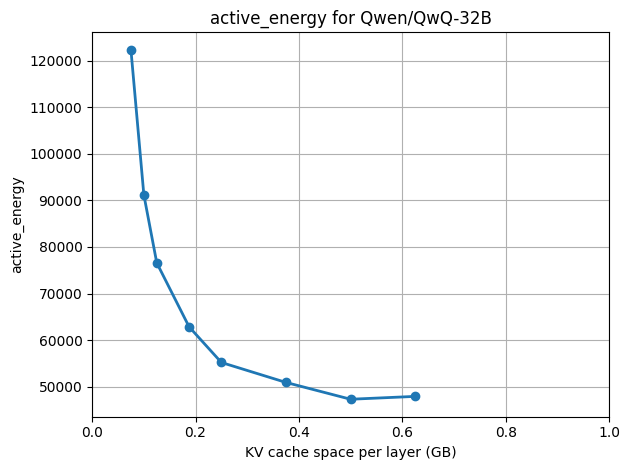

In [13]:
import matplotlib.pyplot as plt

for metric in ['Latency Total (s)', 'Throughput (in+out) tok/s', 'active_energy']:
    for model in models:
        sub_df = df[df['Model Name'] == model]
        plt.figure()
        plt.plot(
            (sub_df['Mem Util'] * 80 - sub_df['# params']) / sub_df['layers'],
            sub_df[metric],
            marker='o',
            linestyle='-',
            linewidth=2
        )
        plt.xlabel('KV cache space per layer (GB)')
        plt.ylabel(metric)
        plt.title(f"{metric} for {model}")
        plt.grid(True)
        plt.xlim(0, 1.0)          # ← fix x-axis limits here
        plt.tight_layout()
        plt.show()
